### Logistic Regression

Logistic regression is another regression model used when a response variable is logical or binary (true/false, yes/no, etc.). Unlike linear regression, which predicts continuous numerical outcomes, logistic regression predicts a discrete categorical outcome with an assigned probability.

The dataset used for demonstration will be a sample telecommunications company customer churn dataset.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

churn = pd.read_csv('Data/churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


From the data, note that:
- A `has_churned` value of 0 means that a customer is still an active subscriber; otherwise, it is 1.
- The time values for columns `time_since_first_purchase` and `time_since_last_purchase` are as they are due to standardization for privacy reasons.

First, let's see what happens if we try to fit the data with a linear regression model.

In [5]:
from statsmodels.formula.api import ols

churn_linear = ols('has_churned ~ time_since_last_purchase', data=churn).fit()
intercept, slope = churn_linear.params

# Coefficients will be visualized shortly
print(intercept, slope)

0.49078015222740057 0.06378347043715497


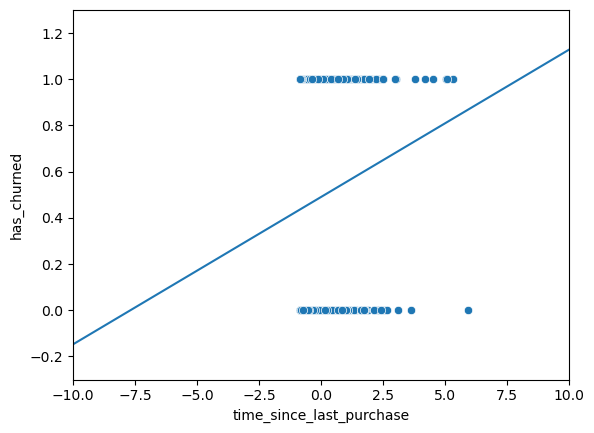

In [11]:
sns.scatterplot(
    x='time_since_last_purchase',
    y='has_churned',
    data=churn
)

plt.axline(xy1=(0, intercept), slope=slope)

plt.xlim(-10,10)
plt.ylim(-0.3, 1.3)
plt.show()

Notice how the model predicts probabilities greater than 1 and less than zero. This shows that linear regression is not the ideal model for the data.

In [12]:
# Importing the logistic regression model 
from statsmodels.formula.api import logit

# Notice the logit() method call here is similar to
# the ols() method call we do in linear regression

churn_logit = logit('has_churned ~ time_since_last_purchase', data=churn).fit()
churn_logit.params

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64

The parameters returned here are slightly different. The first parameter, intercept or `b_0` (beta 0), represents the baseline log-odds when *X = 0*(predictor variable is *X*). The slope (here, it is `time_since_last_purchase`), or `b_1` (beta 1), shows the change in log-odds per 1-unit increase in *X*.

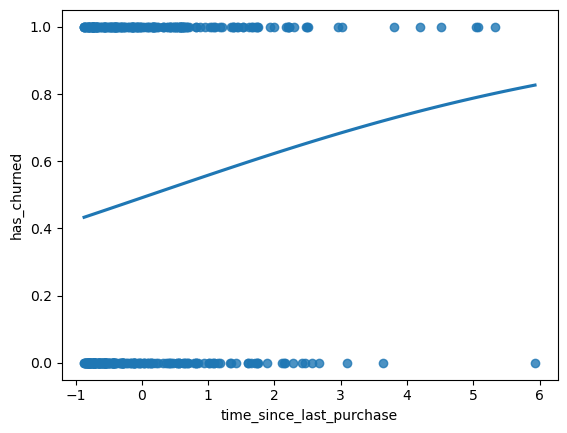

In [29]:
# Visualizing the model
# Notice that the curve is not a straight line; it's more of an S-curve
# Well, it will look more of an S-curve on data with greater range

sns.regplot(
    x='time_since_last_purchase',
    y='has_churned',
    data=churn,
    ci=None,
    logistic=True
)

plt.show()
